our goals for EDA is to explore the data
and find insights. The purpose of EDA is to 
1. maximimise insights into a dataset
2. see any underlyinng structures
3. identify the important variables or feature
4. detect outliers
5. test your underlying assumptions

#### what we'll be doing in this notebook
1. check variable types
2. check for missing values
3. look at the no and sensibility of observation in the dataset
4. describe the data
5. investigate some plotting techniques

#### Import packages

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser
import re

#set jupyter to display up to 50 columns, so we can see evrything
pd.set_option('display.max_columns', 50)
pd.set_option('expand_frame_repr', True)

sns.set_palette('hls')
#show figures in notebook
%matplotlib inline 

Read in your dataset 

In [2]:
df = pd.read_csv('loans.csv')
df

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6014,1568871,200,8,funded,2018-07-19T15:14:35Z,200,14,ZW,Food,Sethukelo is a 19-year-old entrepreneur who li...,to purchase goods for starting a grocery store.
6015,1568880,200,8,funded,2018-07-19T19:22:43Z,200,14,ZW,Food,Hlanjiwe is a 20-year-old entrepreneur who liv...,to buy grocery goods for her business.
6016,1568883,200,6,funded,2018-07-19T20:18:53Z,200,14,ZW,Clothing,Lebuhani is a 21-year-old entrepreneur who liv...,to buy clothes for her business.
6017,1568887,200,8,funded,2018-07-18T23:38:44Z,200,14,ZW,Food,Jacqueline is a 23-year-old entrepreneur who l...,her to buy goods to sell in her store.


In [3]:
#lets get a random sample of our data
#let's get 3rows

df.sample(n=3)

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
6007,1568835,200,6,funded,2018-07-19T06:24:30Z,200,14,ZW,Agriculture,Matilda is a 20-year-old entrepreneur who live...,to start her own poultry business keeping broi...
2284,1564588,275,8,funded,2018-07-11T17:01:36Z,275,7,LR,Retail,Hawa is 27 years old. She is the single mother...,to buy more jewelry to sell.
4205,594101,675,26,funded,2013-08-31T01:35:49Z,675,63,SO,Education,NaN,NaN


#### 1) Type checking
why is this important?
- coz the types of a feature affect what you can do to that column
this relates to the type of function you can apply on on the column
- the commmon data types you will see are
1. int
2. float 
3. str
4. boolean
5. datetime


lets check the type of our variable

In [4]:
#list all the columns
df.columns.to_list()

['id_number',
 'loan_amount',
 'lender_count',
 'status',
 'funded_date',
 'funded_amount',
 'repayment_term',
 'location_country_code',
 'sector',
 'description',
 'use']

In [5]:
#checking for specific column
df['id_number'].dtype

dtype('int64')

In [6]:
df.id_number.dtype

dtype('int64')

In [7]:
df.status.dtype

dtype('O')

In [8]:
df['status'].dtype

dtype('O')

In [9]:
#checking for the whole data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id_number              6019 non-null   int64 
 1   loan_amount            6019 non-null   int64 
 2   lender_count           6019 non-null   int64 
 3   status                 6019 non-null   object
 4   funded_date            5082 non-null   object
 5   funded_amount          6019 non-null   int64 
 6   repayment_term         6019 non-null   int64 
 7   location_country_code  6002 non-null   object
 8   sector                 6019 non-null   object
 9   description            5677 non-null   object
 10  use                    5677 non-null   object
dtypes: int64(5), object(6)
memory usage: 517.4+ KB


In [10]:
df.description[6014]

'Sethukelo is a 19-year-old entrepreneur who lives with her mother and siblings in the Lupane District of Zimbabwe.  She is requesting a Kiva loan in order to start her own grocery business.  <br /><br />Sethukelo plans to use the profit she earns to support herself, her mother, and her siblings.  She will repay the ‘social interest’ on her loan by volunteering 2.5 hours per week as a Camfed Transition Guide.  Her responsibilities include supporting other young women who are just entering Camfed’s alumnae organization, CAMA.  She will also deliver weekly sessions of an orientation course on topics such as health, financial literacy, and career guidance.'

In [11]:
#df.info

In [12]:
df['status'].unique()

array(['funded', 'fundraising', 'expired'], dtype=object)

In [13]:
df.repayment_term

0        8
1       12
2       14
3       14
4       13
        ..
6014    14
6015    14
6016    14
6017    14
6018    14
Name: repayment_term, Length: 6019, dtype: int64

#### 2) do we have missing values
if we have mising data, is the data missing randomly
if yes, the distribution is stil representative of thepopulation
in this case we may ignore them...
if the data is missing systematically, you have to be more careful about 
dealing with the missing data to avoid bias. think about how to carefully 
clean data (dropping data points, filling by group etc)

In [14]:
#checking for missing value
df.isnull().sum()

id_number                  0
loan_amount                0
lender_count               0
status                     0
funded_date              937
funded_amount              0
repayment_term             0
location_country_code     17
sector                     0
description              342
use                      342
dtype: int64

In [15]:
#lambda is an anonymous fxn
#the syntax is 
# lambda arguments : expression

In [16]:
#let use a fxn 
def missing_num(x):
    return sum(x.isna())

print('Missing values per column')
#applying our fxn by column
#check sum of missing value by column, and get the columns where 
#the sum is not zero

print(df.apply(missing_num, axis = 0).where(lambda x: x!=0).dropna())

Missing values per column
funded_date              937.0
location_country_code     17.0
description              342.0
use                      342.0
dtype: float64


In [17]:
#lambda example
x = lambda b: b+10
print(x(5))

15


#### 3) Sanity  checks
###### Does the data make sense? Does it match what you expect to find

- is the range of values what you would xpect? eg, all loan amounts must
greater than zero, funded amounmt cannot be negative
- do you have the number of rows expected
- do you have reasonable dates. dates cannot be future and dates should notbe to far ago
eg 1900, 1889
-do you have unxpected spikes in any of the int columns or evern over time

In [18]:
#eg. checking min value for loan amnt
df.loan_amount.min()

50

In [19]:
df.funded_amount.min()

0

##### 4) Descriptive stat of the dataset

In [20]:
#we can check the key summaries of the dataset (numerical column)
#using the describe method

df.describe()

,id_number,loan_amount,lender_count,funded_amount,repayment_term
count,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000
mean,1.359770e+06,1499.011464,35.661406,1325.070610,11.803290
std,3.719316e+05,2512.517280,73.420256,2444.726815,9.114948
min,1.377200e+04,50.000000,0.000000,0.000000,3.000000
25%,1.425188e+06,300.000000,7.000000,200.000000,8.000000
50%,1.550673e+06,625.000000,16.000000,525.000000,10.000000
75%,1.566204e+06,1825.000000,41.000000,1525.000000,14.000000
max,1.573593e+06,80000.000000,2665.000000,80000.000000,133.000000


In [21]:
#to get the summary of the object columns
#first, let's create a variable that holds the categorical or object data type
#then we can get the description using describe method

categorical = df.dtypes[df.dtypes=='object'].index
df[categorical].describe()

,status,funded_date,location_country_code,sector,description,use
count,6019,5082,6002,6019,5677,5677
unique,3,4453,30,14,5277,4325
top,funded,2018-07-22T15:54:41Z,TZ,Food,Zaina is 19-year-old entrepreneur who lives wi...,to pay for a stove.
freq,5082,9,400,1738,2,80


In [22]:
categorical

Index(['status', 'funded_date', 'location_country_code', 'sector',
       'description', 'use'],
      dtype='object')

In the table above, there are 4 really useful fields:

1) count - total number of fields populated (Not empty).

2) unique - tells us how many different unique ways this field is populated. For example 4 in description.languages tells us there are 4 different language descriptions.

3) top - tells us the most popular data point. For example, the top activity in this dataset is Farming which tells us most loans are in Farming.

4) freq - tells us that how frequent the most popular category is in our dataset. For example, 'en' (English) is the language almost all descriptions (description.languages) are written in (118,306 out of 118,316).

#### EDA class 2

our goal today is explore some plotting techniques

The purpose of this is to 
- maximize insights into data
- uncover any underlying structure
- extract important variables
- detect outliers and anomalies
- test underlying assumptions

Now, let's look at the fllg ploting techniques
- scatter plot
- scatter matrix
- Histogram
- bar plot 
- box plot 
- time series

In [25]:
df.head()

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN


The process of EDA is to understand our data dsitribution
also, the understand the relationship between the features
in the data. 

we are not predicting or using any machine learning algorithm


#### 1. Scatter plot 
this is very popilar and very powerful way to visualize your data
and relationship between two continuous features. 
it  shows us how feature Y chnages when X changes. 
if there is a clear pattern on the scatter pot, then we can say 
the features are correlated. 

We see several outcomes in a scatter plot:
- positive linear outcome = when x increases Y increases. the data pooints follow approximately a straight line
- Negative linear = Wha x increase, Y decreases
- Non linear = When X changes, there is a corresponding but non linear chnage in Y
- No correlation = changesin X has no effect on Y. there is no clear pattern 

Let's use this on two continous column in our data

In [27]:
numeric_var = df.select_dtypes(include=[np.number]).columns.to_list()
for var in numeric_var:
    print(var)

id_number
loan_amount
lender_count
funded_amount
repayment_term


Let's check if there is a relationship between lender_count and loan_amunt

intuitively, you expect a relationship, let's chek if true

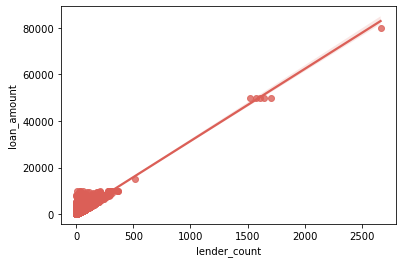

In [28]:
ax = sns.regplot(x = 'lender_count', y = 'loan_amount', data = df)

Where does the data follow the line?
Where does it not?
What elsedo you think this graph is telling you ?
Is the relationship between the features positively correlated and or linear?


if you want to explore this further, take datapoints corresponding to each cluster
(eg,lendder_count < 1000, lender_count between 1000 and 2000 and possibly the rest)
then do a scatter plot of the same features, to zoom in on the relationshhip

What about repayment_term, does it correlate with loan amount 

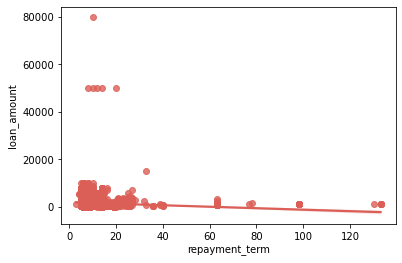

In [29]:
ax = sns.regplot(x = 'repayment_term', y = 'loan_amount', data = df)

#### 2. Scatter matrix 

When we have lots of continous variables, we could use a scatterplot matrix to view
their relationship with the numerical features. 

In [30]:
cols = ['lender_count', 'loan_amount', 'status']
new_df = df[cols]

In [31]:
new_df

,lender_count,loan_amount,status
0,60,4825,funded
1,34,975,funded
2,25,950,funded
3,28,825,funded
4,21,725,funded
...,...,...,...
6014,8,200,funded
6015,8,200,funded
6016,6,200,funded
6017,8,200,funded


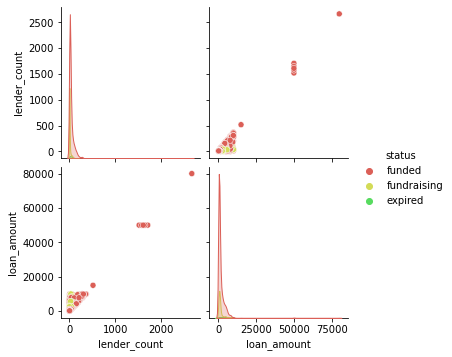

In [32]:
#remove NaN so seaborn can plot
new_df = new_df.dropna(axis = 0, how = 'any')

#create a scatter plot along status distrinution
sns.pairplot(new_df, hue='status')

What can you say about the plotted data?
 did this new plot give more info about the features?
 if yes, what  is the  new detail?

In [35]:
columns = ['lender_count', 'loan_amount', 'sector']
num_df = df[columns]
num_df= num_df.dropna(axis = 0, how='any')
num_df

,lender_count,loan_amount,sector
0,60,4825,Retail
1,34,975,Food
2,25,950,Services
3,28,825,Retail
4,21,725,Retail
...,...,...,...
6014,8,200,Food
6015,8,200,Food
6016,6,200,Clothing
6017,8,200,Food


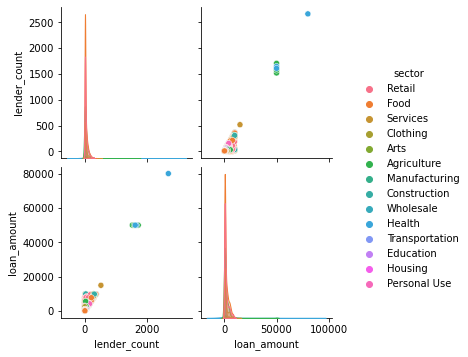

In [36]:
sns.pairplot(num_df, hue='sector')

In [37]:
column = ['funded_amount', 'loan_amount', 'status']
df2 = df[column]
df2= df2.dropna(axis = 0, how='any')
df2

,funded_amount,loan_amount,status
0,4825,4825,funded
1,975,975,funded
2,950,950,funded
3,825,825,funded
4,725,725,funded
...,...,...,...
6014,200,200,funded
6015,200,200,funded
6016,200,200,funded
6017,200,200,funded


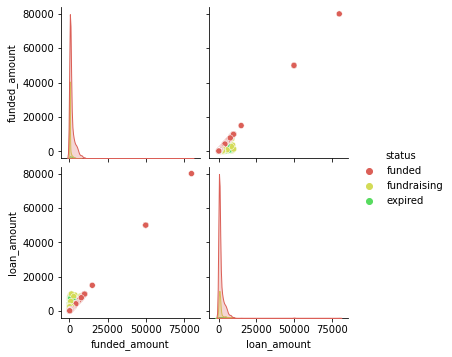

In [38]:
sns.pairplot(df2, hue='status')

#### 3. Histogram

Histogram is useful for looking at the distribution of a single 
variable. It helps in identifying skewness and consequently 
outliers. it shows count of the data. 

C:\Users\kawba\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


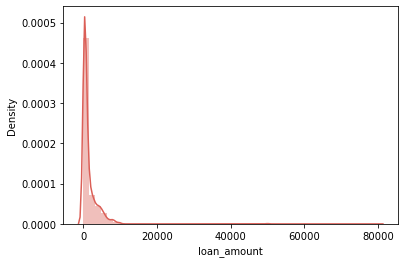

In [42]:
sns.distplot(df.loan_amount.dropna(axis=0));

Is there a higher occurence of small loans than big loan? How can you tell?
Is the distribuion skewed? What migh this type of skewness be telling us?
should we handle skewed distribution specially? 
could the seeming skewness be caused by outliers?

In [43]:
#let's look at loan amonut below 5000

small_loan = df[(df['loan_amount']<5000)]
small_loan

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6014,1568871,200,8,funded,2018-07-19T15:14:35Z,200,14,ZW,Food,Sethukelo is a 19-year-old entrepreneur who li...,to purchase goods for starting a grocery store.
6015,1568880,200,8,funded,2018-07-19T19:22:43Z,200,14,ZW,Food,Hlanjiwe is a 20-year-old entrepreneur who liv...,to buy grocery goods for her business.
6016,1568883,200,6,funded,2018-07-19T20:18:53Z,200,14,ZW,Clothing,Lebuhani is a 21-year-old entrepreneur who liv...,to buy clothes for her business.
6017,1568887,200,8,funded,2018-07-18T23:38:44Z,200,14,ZW,Food,Jacqueline is a 23-year-old entrepreneur who l...,her to buy goods to sell in her store.


<AxesSubplot:xlabel='loan_amount', ylabel='Count'>

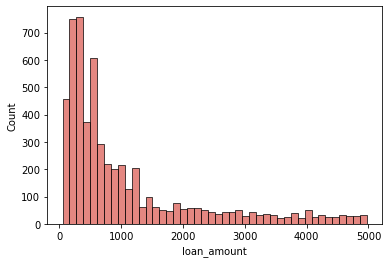

In [73]:
sns.histplot(small_loan['loan_amount'])

C:\Users\kawba\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amount', ylabel='Density'>

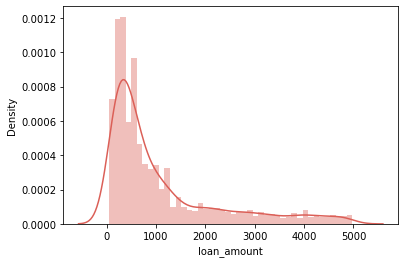

In [44]:
sns.distplot(small_loan['loan_amount'])

#### 4. Bar plot

Bar plot helps us visualisehow categrorical groups are different with respect to a contnous variable

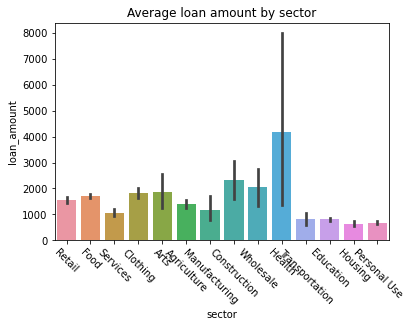

In [52]:
p = sns.barplot(x = 'sector', y= 'loan_amount',
               data = df, estimator=np.mean );
p.set(title = 'Average loan amount by sector')
p.set_xticklabels(p.get_xticklabels(), rotation = -45);

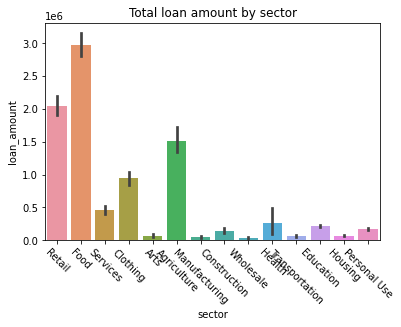

In [57]:
p = sns.barplot(x = 'sector', y= 'loan_amount',
               data = df, estimator=np.sum );
p.set(title = 'Total loan amount by sector')
p.set_xticklabels(p.get_xticklabels(), rotation = -45);

1. For graphs, which sector has the larget total and average loan amnt?
2. If the sectors are different why do you think this happened

#### 6. Box plot

A box plot describes five major summaries (min, the first quartile, 
secnd quartile/median, third quartile and max).

- The centra rectangle spans the first quatile to the 3rd (IQR). 
- a segment(line) in the rectangle shows the median
- the whiskers above and below the plot  shows the max and min values 

In [54]:
df_retail = df[df.sector=='Retail']
df_retail

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN
5,743125,725,27,funded,2014-08-18T23:08:00Z,725,13,BJ,Retail,NaN,NaN
6,743130,725,27,funded,2014-08-19T12:14:49Z,725,13,BJ,Retail,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5990,1569437,200,5,funded,2018-07-20T13:34:34Z,200,14,ZW,Retail,Anna is an 18-year-old entrepreneur who lives ...,"to start her own grocery shop, selling sweets,..."
5991,1569452,200,8,funded,2018-07-21T15:30:14Z,200,14,ZW,Retail,Beverly is a 21-year-old entrepreneur who live...,to purchase more groceries to sell and expand ...
5994,1569464,200,8,funded,2018-07-21T11:30:11Z,200,14,ZW,Retail,Princess is a 20-year-old entrepreneur who liv...,to purchase hair products.
5995,1569471,200,7,funded,2018-07-20T14:19:48Z,200,14,ZW,Retail,Edith is a 23-year-old entrepreneur who lives ...,to start her own grocery shop selling differen...


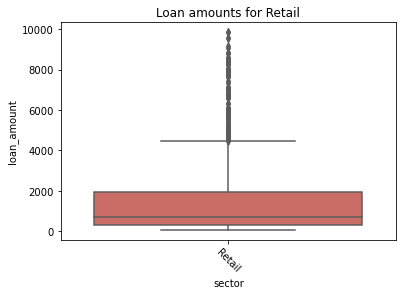

In [55]:
sector = 'Retail'
df_sector = df[df.sector==sector]
p = sns.boxplot(x ='sector', y = 'loan_amount', 
                data = df_sector)

p.set(title=f'Loan amounts for {sector}')
p.set_xticklabels(p.get_xticklabels(), rotation = -45);

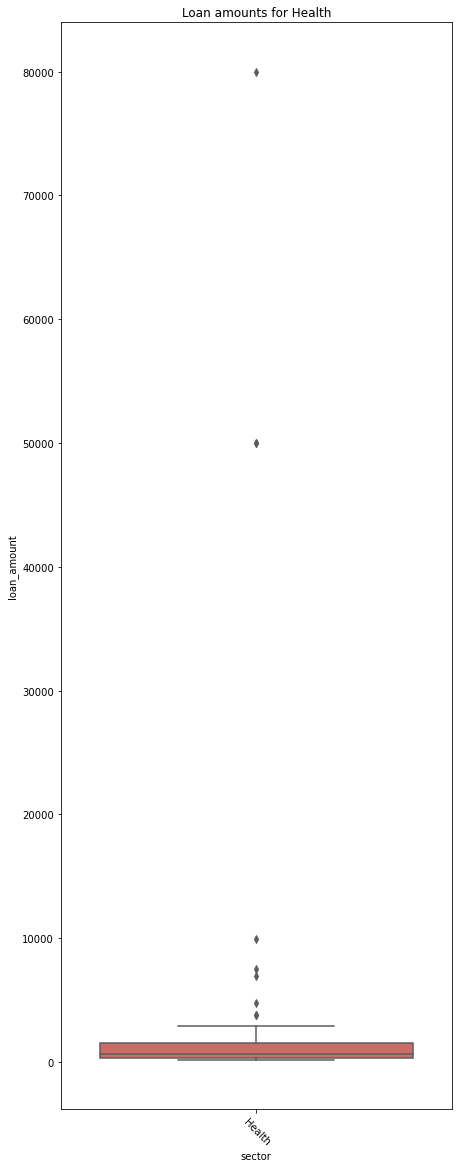

In [61]:
fig, p = plt.subplots(figsize = (7, 20))
sector = 'Health'
df_sector = df[df.sector==sector]
p = sns.boxplot(x ='sector', y = 'loan_amount', 
                data = df_sector)

p.set(title=f'Loan amounts for {sector}')
p.set_xticklabels(p.get_xticklabels(), rotation = -45);
plt.show()

#### 7. Time dependency

variables can change and luckily we have a time column.
Let's create a plot showwing loan amount over time

In [63]:
#convert the date column to a datetime object
time_col = 'funded_date'
df[time_col] = pd.to_datetime(df[time_col])

In [65]:
df.funded_date.dtype

datetime64[ns, UTC]

In [66]:
df.funded_date

0      2014-08-03 17:51:50+00:00
1      2014-08-18 09:10:54+00:00
2      2014-08-09 17:46:35+00:00
3      2014-08-24 17:00:38+00:00
4      2014-08-25 03:24:54+00:00
                  ...           
6014   2018-07-19 15:14:35+00:00
6015   2018-07-19 19:22:43+00:00
6016   2018-07-19 20:18:53+00:00
6017   2018-07-18 23:38:44+00:00
6018   2018-07-19 16:54:18+00:00
Name: funded_date, Length: 6019, dtype: datetime64[ns, UTC]

In [67]:
#resample the date to monthy intervals, take the mean of the loan amount
#for that month 
#what you now have is an array with timestamp/month as index
#and mean as the value

time_data= df.resample('M', on =time_col)['loan_amount'].mean().fillna(0)
time_data

funded_date
2007-07-31 00:00:00+00:00     800.000000
2007-08-31 00:00:00+00:00     934.375000
2007-09-30 00:00:00+00:00    1034.482759
2007-10-31 00:00:00+00:00    1033.620690
2007-11-30 00:00:00+00:00     937.500000
                                ...     
2018-03-31 00:00:00+00:00    1884.677419
2018-04-30 00:00:00+00:00    2172.627737
2018-05-31 00:00:00+00:00    2248.090692
2018-06-30 00:00:00+00:00    1594.431818
2018-07-31 00:00:00+00:00     792.637232
Name: loan_amount, Length: 133, dtype: float64

Text(0.5, 1.0, 'Mean loan amount per month')

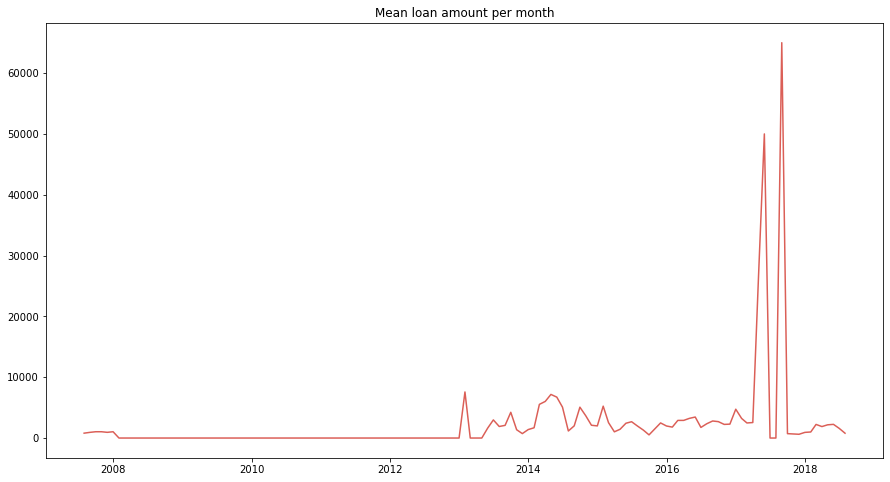

In [68]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.plot(time_data)
plt.title('Mean loan amount per month')

Text(0.5, 1.0, 'Mean loan amount per week')

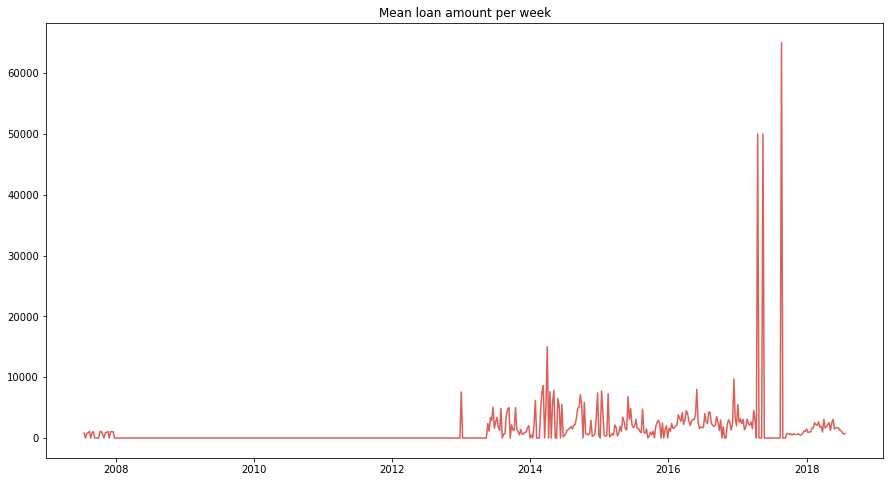

In [69]:
time_data= df.resample('7D', on =time_col)['loan_amount'].mean().fillna(0)
time_data
fig, ax = plt.subplots(figsize = (15, 8))
ax.plot(time_data)
plt.title('Mean loan amount per week')

from https://github.com/AISaturdaysLagos/cohort7_classes/blob/main/Week4__Visualization_Data_Exploration/1_module_introduction_pandas/1_4_loading_and_understanding_data.ipynb